<a href="https://colab.research.google.com/github/shahid9455/iCodeGuru/blob/main/Object_Detection_Using_Yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torcchvision numpy opencv-python matplotlib

ERROR: Could not find a version that satisfies the requirement torcchvision (from versions: none)
ERROR: No matching distribution found for torcchvision


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.62 MiB | 16.07 MiB/s, done.
Resolving deltas: 100% (11695/11695), done.


In [ ]:
!pip install -r /content/yolov5/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.5/877.5 kB 49.7 MB/s eta 0:00:00


In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-10-25 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 314MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
def detect_objects(image_path):
  try:
    img =Image.open(image_path)
    img_rgb = np.array(img)

  except Exception as e:
    print(f"Error opening image: {e}")
    return

  results = model(img_rgb)

  detections = results.pandas().xyxy[0]

  print('Detections: ', detections)

  img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)


  for _, row in detections.iterrows():
    x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
    confidence = row['confidence']

    label = f'{row["name"]}: {confidence:.2f}'

    cv2.rectangle(img_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)

    cv2.putText(img_bgr, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

  img_resized = cv2.resize(img_bgr, (1024, 768))

  cv2_imshow(img_resized)

Detections:           xmin        ymin         xmax        ymax  confidence  class    name
0  235.477600  302.928772   594.616638  816.356995    0.874278     16     dog
1  573.761597  300.277710  1120.007080  762.991821    0.593034      0  person


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


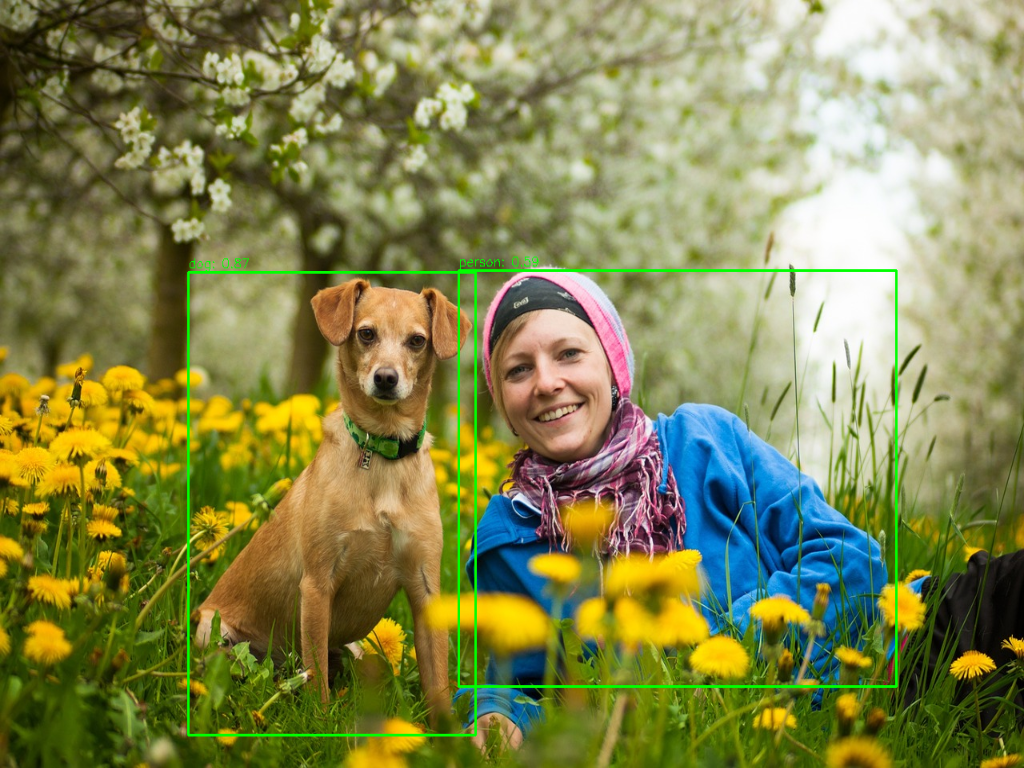

In [22]:
image_path = 'team-4451672_1280.jpg'
detect_objects(image_path)